In [59]:
# Affine Transformations via Matrix Application

In [60]:
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

In [61]:
v = np.array([3,1])
v

array([3, 1])

In [62]:
def plotVectors(vectors,colors):
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color='lightgray')
    
    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
                   angles='xy',scale_units='xy',scale=1,color=colors[i],)

(-1.0, 5.0)

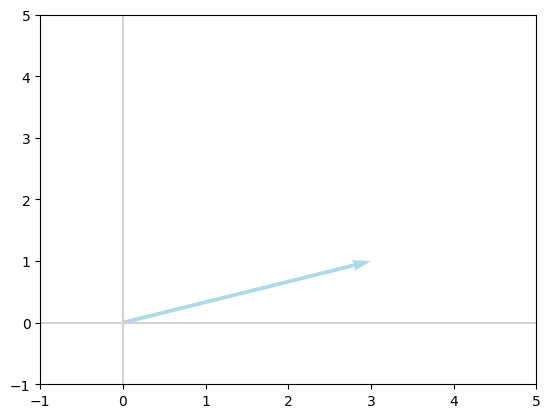

In [63]:
plotVectors([v],['lightblue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

Applying a matrix to a vector (i.e. performing matrix-vector multiplication) can linearly transform the vector eg: rotate it or rescale it

The identity matrix,introduced earlier is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [64]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [65]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [66]:
v == Iv

array([ True,  True])

(-1.0, 5.0)

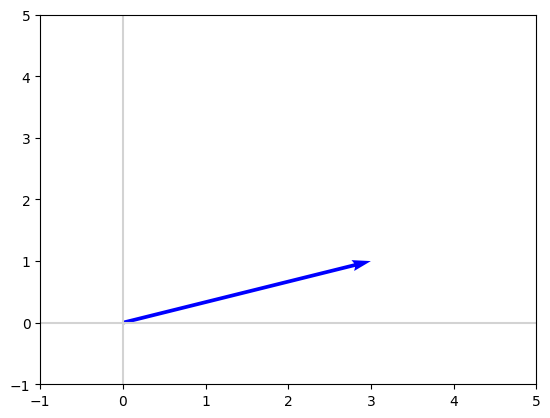

In [67]:
plotVectors([Iv],['blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

In contrast, consider this matrix (let's call it *E*) that flips vectors over the x-axis:

In [68]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [69]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

(-3.0, 3.0)

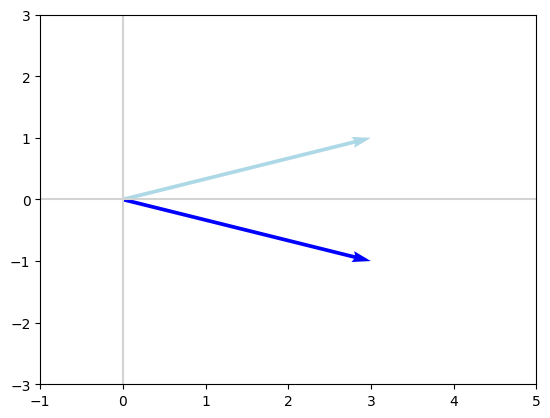

In [70]:
plotVectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-3,3)

Or, this matrix, *F* which flips vectors over the *y*-axis

In [71]:
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [72]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

(-1.0, 5.0)

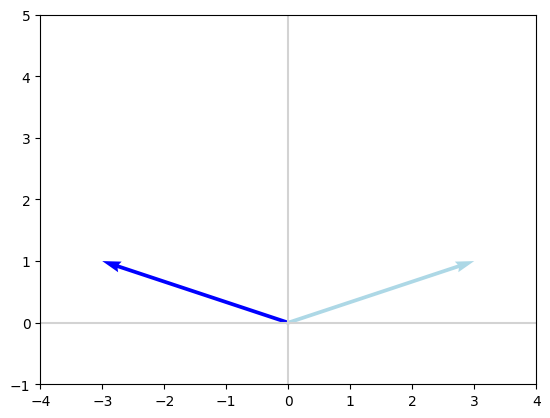

In [73]:
plotVectors([v,Fv],['lightblue','blue'])
plt.xlim(-4,4)
plt.ylim(-1,5)

A single matrix can apply multiple affine transforms simultaneously (eg: flip over an axis and rotate 45 degrees). As an example let's see what happens when we apply this matrix A to the vector *v*

In [74]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [75]:
Av = np.dot(A,v)
Av

array([1, 4])

(-1.0, 5.0)

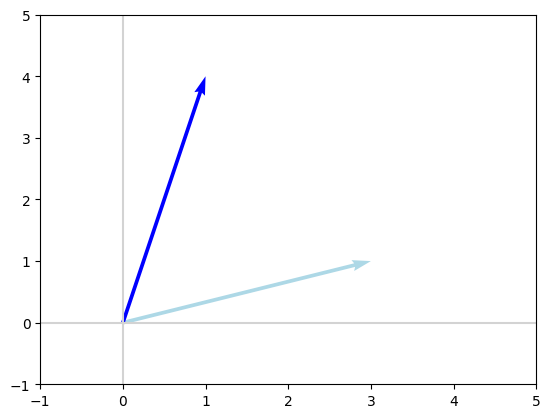

In [76]:
plotVectors([v,Av],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

(-1.0, 5.0)

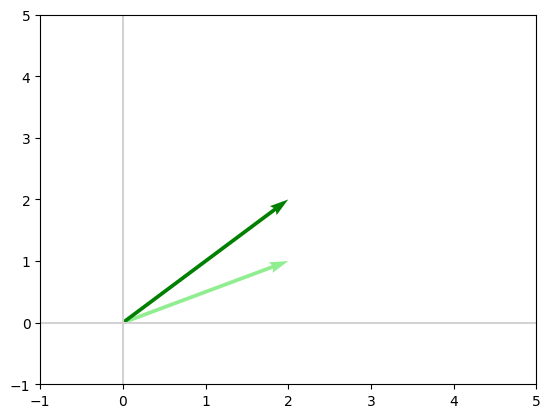

In [77]:
# Another example of applying A:
v2 = np.array([2,1])
plotVectors([v2,np.dot(A,v2)],['lightgreen','green'])
plt.xlim(-1,5)
plt.ylim(-1,5)

we can concatenate several vectors together into a matrix (say,*V*) where each column is separate vector. Then, whatever linear transformations we apply to *V* will be independently applied to each column (vector):

In [78]:
v

array([3, 1])

In [79]:
# recall we need to convert array to 2D to transpose into column eg:
np.matrix(v).T

matrix([[3],
        [1]])

In [80]:
v3 = np.array([-3,-1]) # mirror image of V over both axes 
v4 = np.array([-1,1])

In [81]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)

V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [82]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [83]:
AV = np.dot(A,V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [84]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx,clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [85]:
vectorfy(V,0)

array([3, 1])

In [86]:
vectorfy(V,0) == v

array([ True,  True])

(-5.0, 5.0)

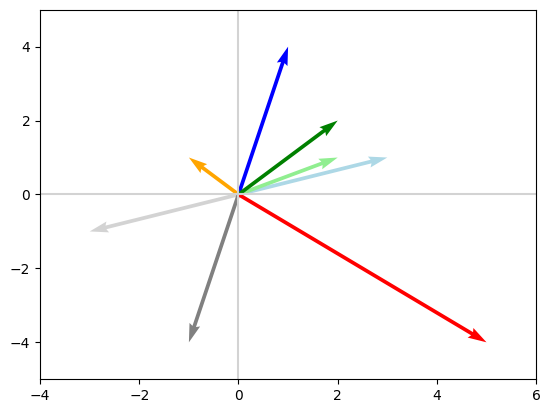

In [87]:
plotVectors([vectorfy(V,0),vectorfy(V,1),vectorfy(V,2),vectorfy(V,3),
             vectorfy(AV,0),vectorfy(AV,1),vectorfy(AV,2),vectorfy(AV,3)],
            ['lightblue','lightgreen','lightgray','orange',
             'blue','green','gray','red'])
plt.xlim(-4,6)
plt.ylim(-5,5)